<html>
    <body>
        <h1 align='center'>Regression for Diabetes</h1>
        <img align='center' src="https://miro.medium.com/max/1600/1*xz_haBuJRSI2DaveNk-3gw.gif" width="400" height="200"></img>
    </body>
</html>

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

plt.style.use('fivethirtyeight')

## Step 1 Data Descriptive Analysis

In [60]:
df = pd.read_csv('diabetes.csv')

#### Amongst the variables of interest identify one that is categorical and one that is quantitative

In [61]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### a) For the categorical variable create a frequency distribution.
#### b) For the categorical variable create a bar diagram.

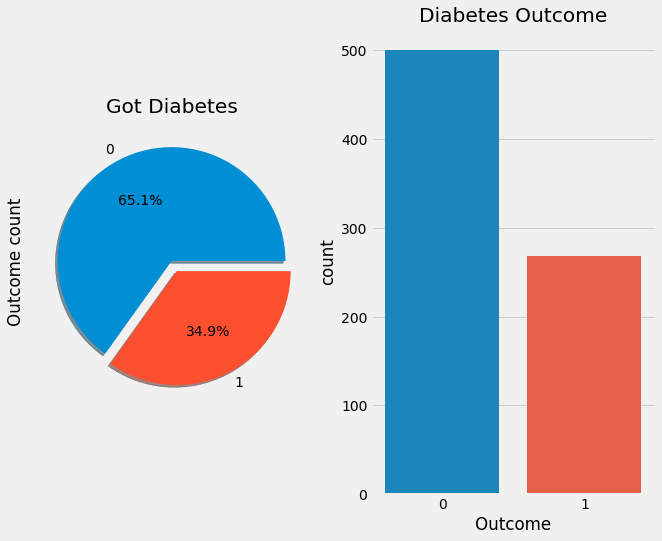

In [63]:
## checking the balance of the data by plotting the count of outcomes by their value
f,ax=plt.subplots(1,2,figsize=(10,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Got Diabetes')
ax[0].set_ylabel('Outcome count')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Diabetes Outcome')
plt.show()

As seen from above, Outcome is a categorical variable.

#### c) For the quantitative variable create numerical summaries grouped by a categorical variable.

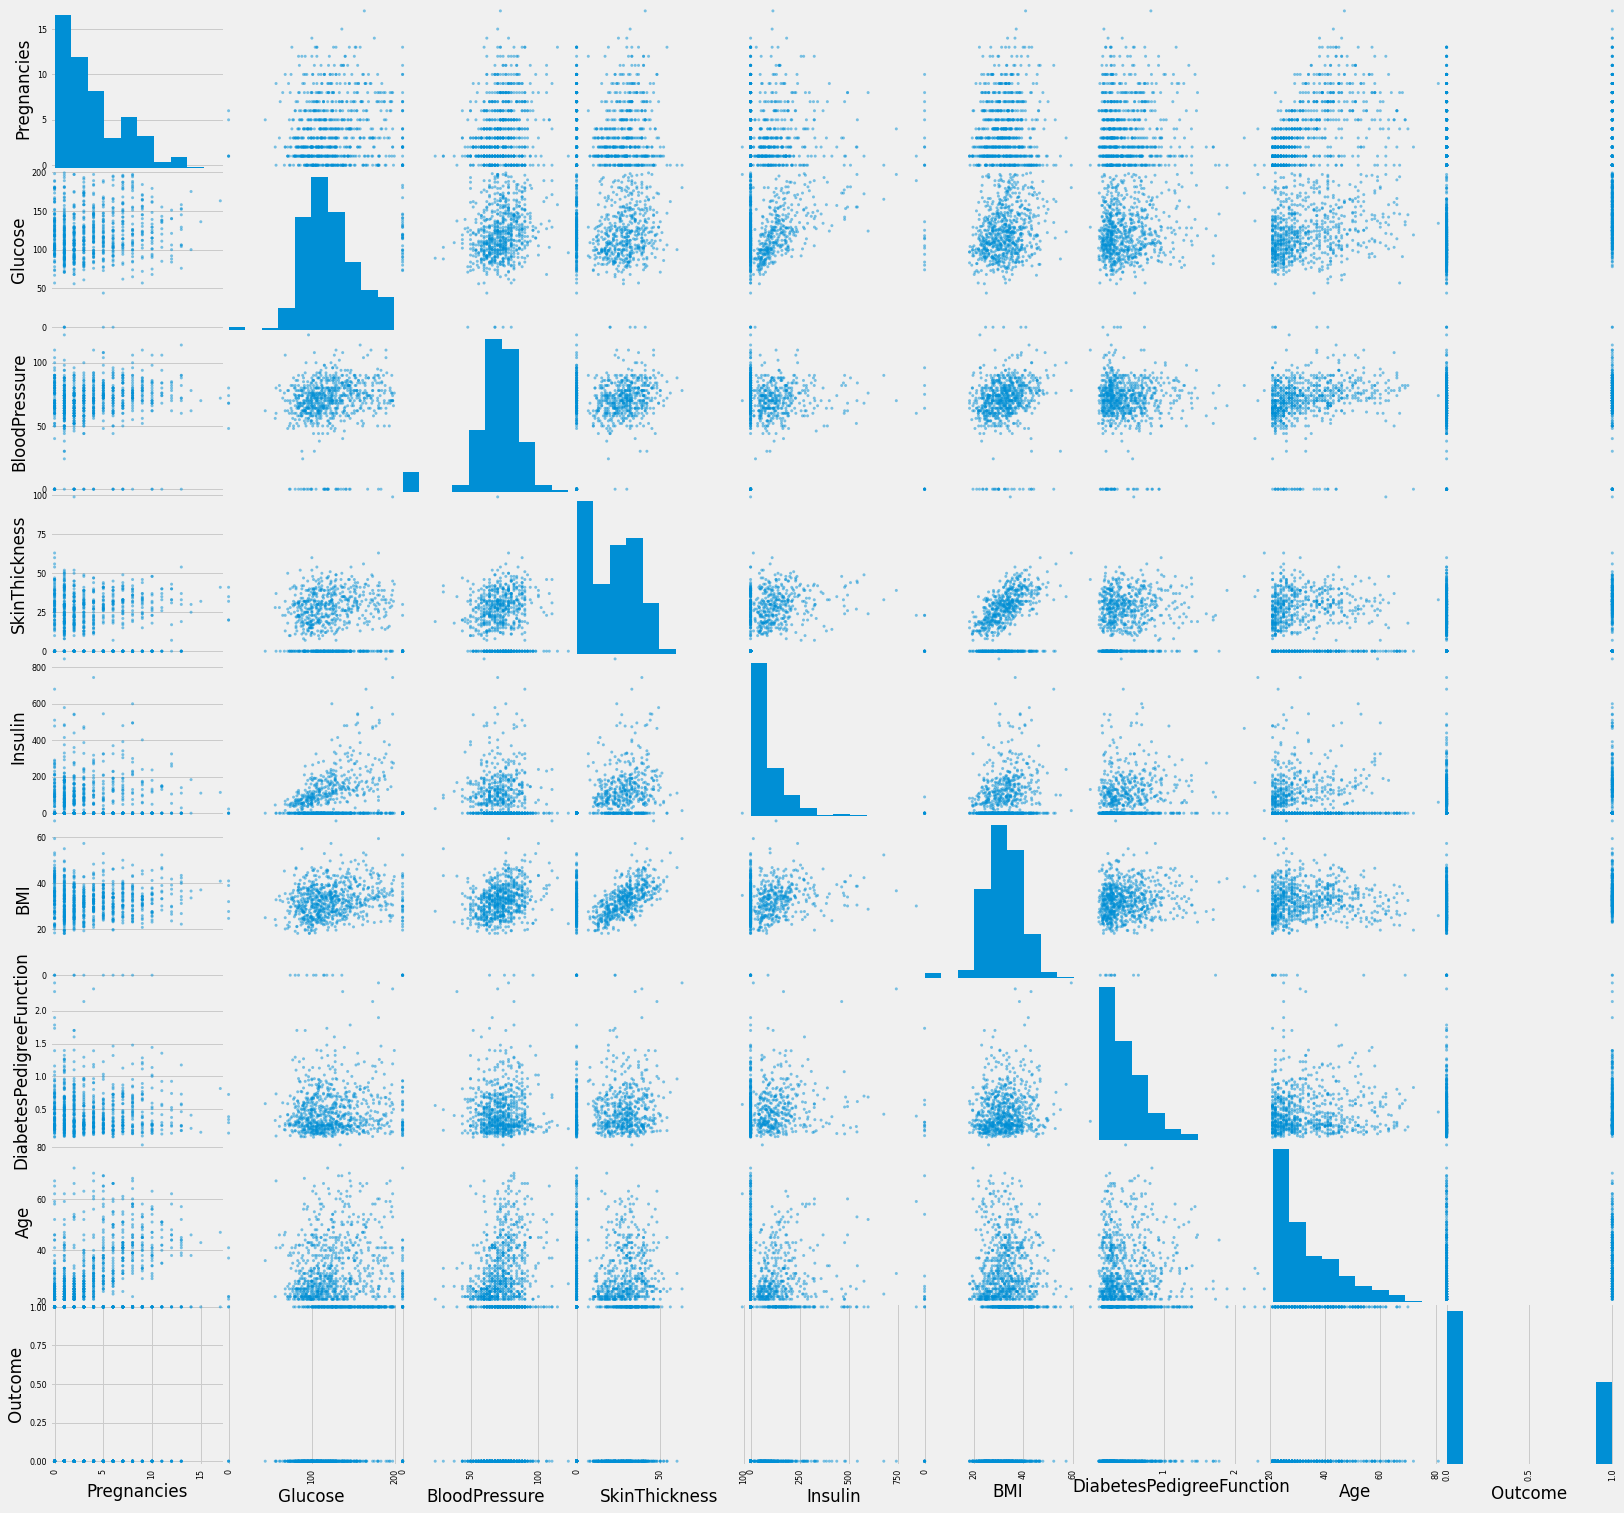

In [64]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

#### d) For quantitative variable create a histogram and a boxplotgrouped by categorical

Text(0.5, 1.0, 'Distribution plot of Outcome vs Pregnancies')

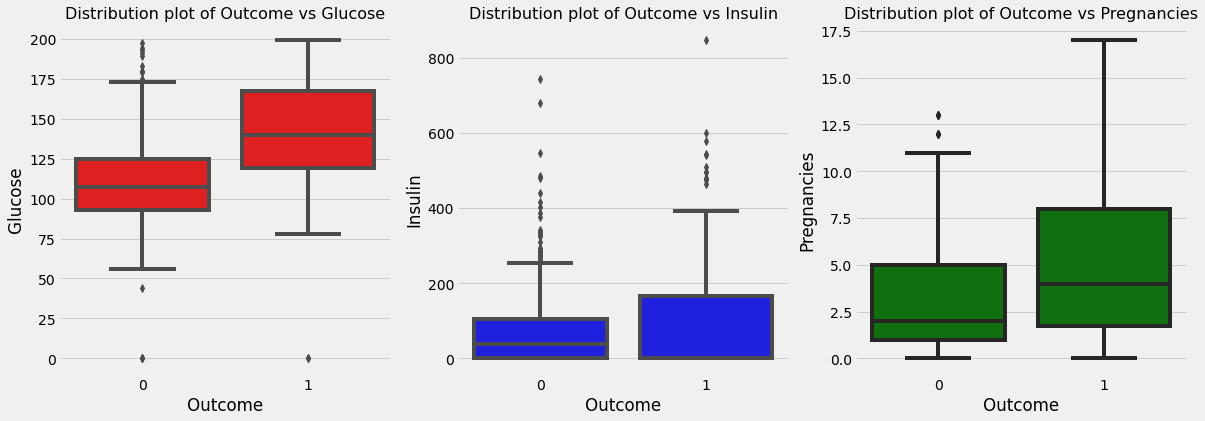

In [65]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(x="Outcome", y="Glucose", data=df,color = 'red')
plt.title("Distribution plot of Outcome vs Glucose", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(x="Outcome", y="Insulin", data=df, color='blue')
plt.title("Distribution plot of Outcome vs Insulin", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(x="Outcome", y="Pregnancies", data=df, color='green')
plt.title("Distribution plot of Outcome vs Pregnancies", fontsize=16)

Text(0.5, 1.0, 'Distribution plot of Outcome vs DiabetesPedigreeFunction')

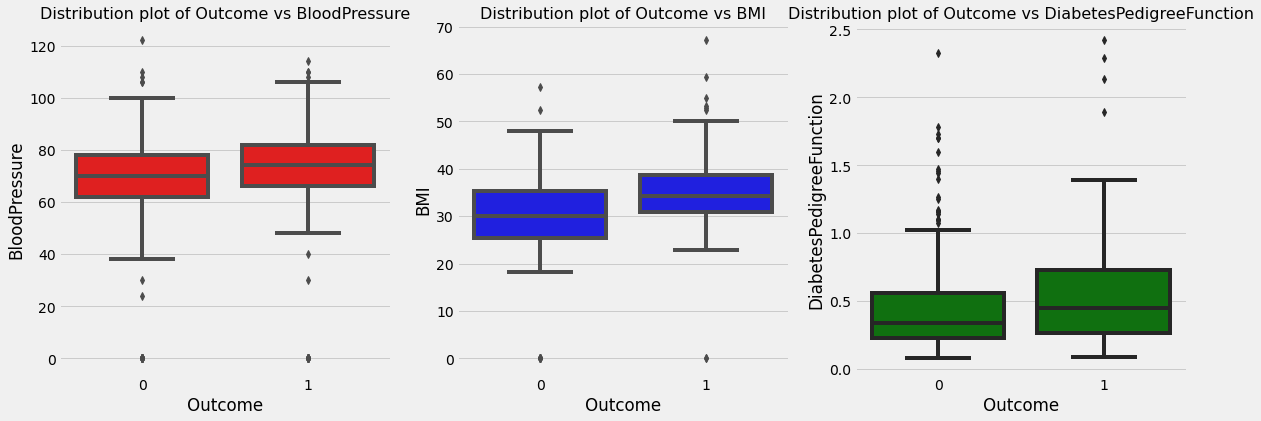

In [66]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(x="Outcome", y="BloodPressure", data=df,color = 'red')
plt.title("Distribution plot of Outcome vs BloodPressure", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(x="Outcome", y="BMI", data=df, color='blue')
plt.title("Distribution plot of Outcome vs BMI", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df, color='green')
plt.title("Distribution plot of Outcome vs DiabetesPedigreeFunction", fontsize=16)

Text(0.5, 1.0, 'Distribution plot of Outcome vs SkinThickness')

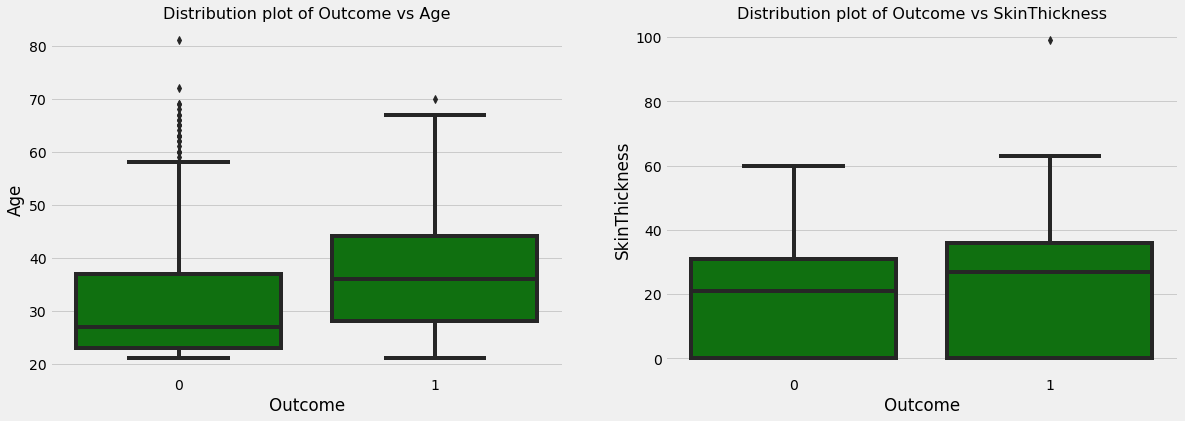

In [67]:
plt.rcParams['figure.figsize'] = (18,6)
plt.subplot(1,2,1)
sns.boxplot(x="Outcome", y="Age", data=df, color='green')
plt.title("Distribution plot of Outcome vs Age", fontsize=16)

plt.subplot(1,2,2)
sns.boxplot(x="Outcome", y="SkinThickness", data=df, color='green')
plt.title("Distribution plot of Outcome vs SkinThickness", fontsize=16)

### Provide your analysis regarding the graphical visualizations.

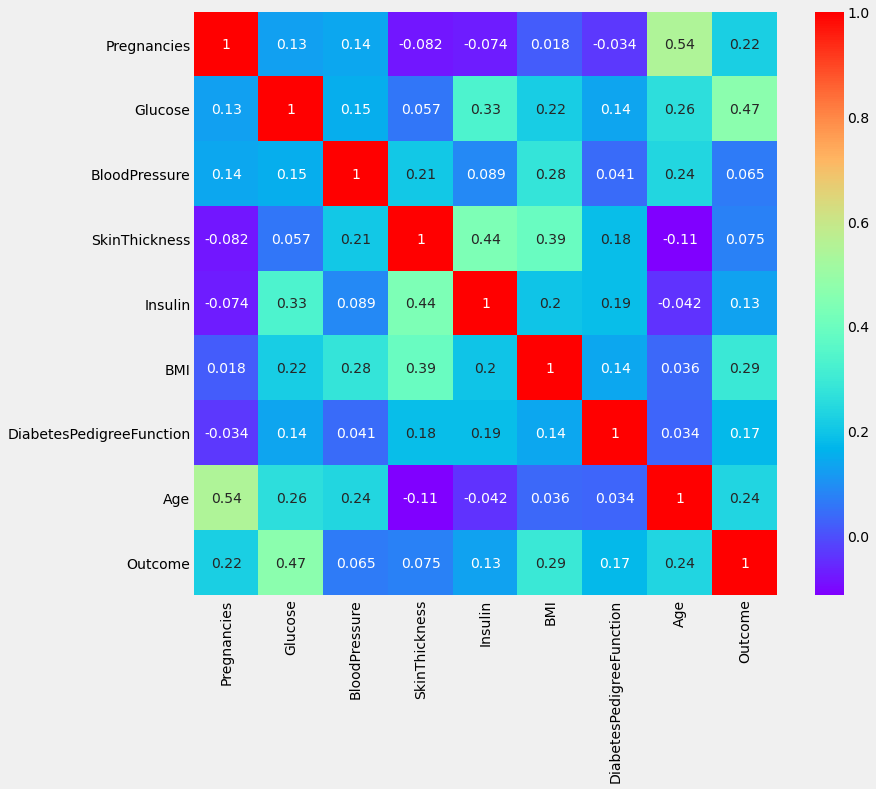

In [68]:
fig=plt.gcf()
fig.set_size_inches(12,10)
fig=sns.heatmap(df.corr(),annot=True,cmap='rainbow',square=True,mask=False)

* Glucose, BMI, Insulin, SkinThickness and Age seem to have high correlation
* There are some 0 Glucose, Insulin and Blood Pressure values, which don't make sense. Marking 0s as nan for faster manipulation

## STEP 3  and RegressionSet up

### Q3.Prepare data by using the following preprocessing transformationand tasks:

#### Check for null values

In [69]:
df.isnull().any().any()

False

There are no null values

#### Check for outliers

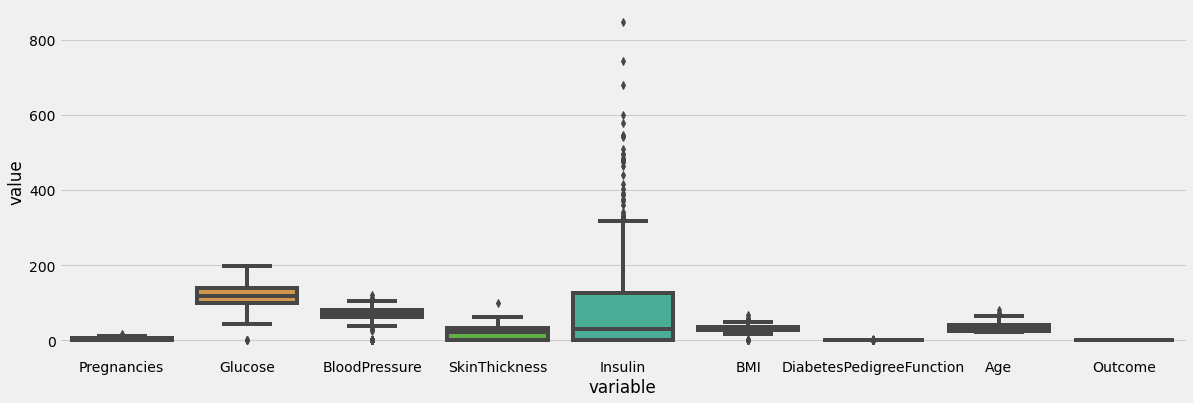

In [70]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

* There are some 0 values for Glucose, BloodPressure, SkinThickness, Insulin and BMI which don't make sense

* I'll replace the 0 values and the outliers with the mean value of the respective columns

In [71]:
df_copy = df.copy(deep=True)
# replacing 0 with nans
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [72]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Step 4 Implement Regression

#### Objective and rationale of using the specific algorithm to achieve the objective.

Evaluate Logistic Regression

#### Steps of implementing the algorithm with regards to the context. Create relevant graphs.

In [73]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [74]:
X = df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age','DiabetesPedigreeFunction']]
y = df_copy.iloc[::,-1]
print(X,y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
0              6    148.0           72.0           35.0    125.0  33.6   50   
1              1     85.0           66.0           29.0    125.0  26.6   31   
2              8    183.0           64.0           29.0    125.0  23.3   32   
3              1     89.0           66.0           23.0     94.0  28.1   21   
4              0    137.0           40.0           35.0    168.0  43.1   33   
..           ...      ...            ...            ...      ...   ...  ...   
763           10    101.0           76.0           48.0    180.0  32.9   63   
764            2    122.0           70.0           27.0    125.0  36.8   27   
765            5    121.0           72.0           23.0    112.0  26.2   30   
766            1    126.0           60.0           29.0    125.0  30.1   47   
767            1     93.0           70.0           31.0    125.0  30.4   23   

     DiabetesPedigreeFunction  
0                  

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#importing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
scalerNB = StandardScaler()
X_train = scalerNB.fit_transform(X_train)
X_test = scalerNB.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
predicted = lr.predict(X_test)

In [77]:
accuracy_score(predicted,y_test)

0.8116883116883117

In [78]:
pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).transpose()


,precision,recall,f1-score,support
0,0.836207,0.906542,0.869955,107.000000
1,0.736842,0.595745,0.658824,47.000000
accuracy,0.811688,0.811688,0.811688,0.811688
macro avg,0.786525,0.751143,0.764389,154.000000
weighted avg,0.805881,0.811688,0.805519,154.000000


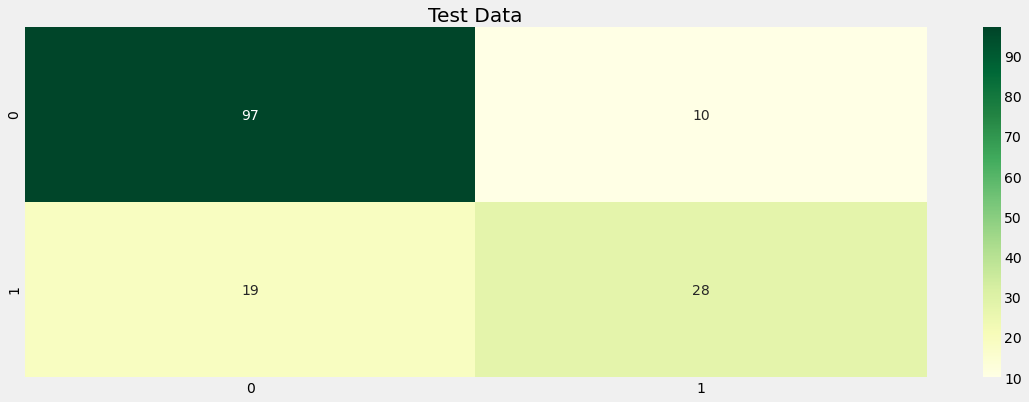

In [79]:
sns.heatmap((confusion_matrix(y_test,predicted)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

#### Interpretation of the results.

* Logistic Regression Model has a very high precision and recall rate. When the outcome is negative (0) it can accurately predict negative outcome.

#### Performance improvement techniques. Use feature selection, variable importance.

In [80]:
# calculate Mean Absolute Error

print(mean_squared_error(y_test, predicted))

0.18831168831168832


In [81]:
from math import sqrt

print(sqrt(mean_squared_error(y_test, predicted)))

0.43394894666502914


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFECV

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))


# evaluate each model in turn
results = []
names = []

In [86]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

LR: 0.763021 (0.036922)
KNN: 0.720079 (0.037986)
CART: 0.703195 (0.039793)
RF: 0.752580 (0.055438)
SVM: 0.651059 (0.003418)
XGB: 0.757826 (0.045805)


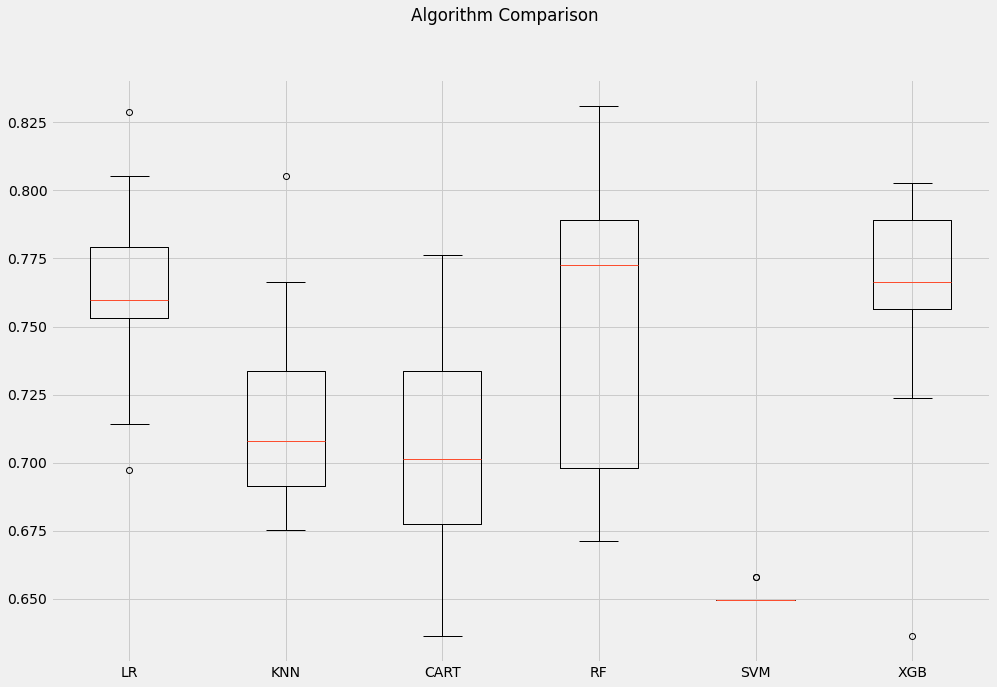

In [83]:
from sklearn.model_selection import cross_val_score

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig =ax= None
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: -0.485306 (0.038170)
KNN: -0.527749 (0.037454)
CART: -0.560718 (0.056530)
RF: -0.489366 (0.052235)
SVM: -0.590705 (0.002904)
XGB: -0.489792 (0.047721)


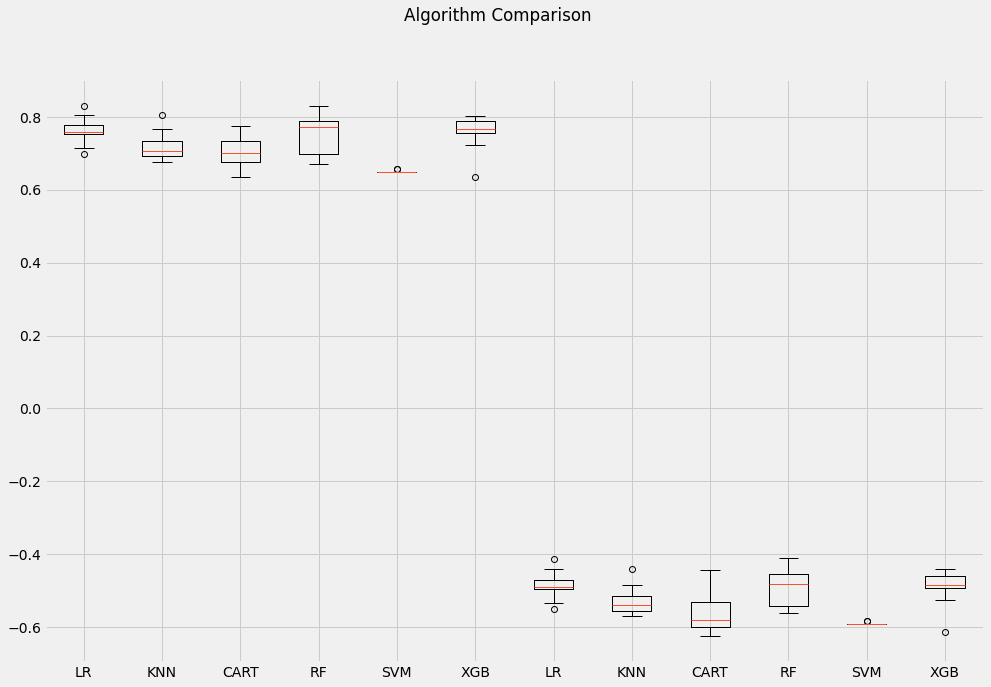

In [87]:
from sklearn.model_selection import cross_val_score

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "neg_root_mean_squared_error")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = ax= None
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [101]:
X=df.loc[:, 'Pregnancies':'Age']
y=df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [102]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50)

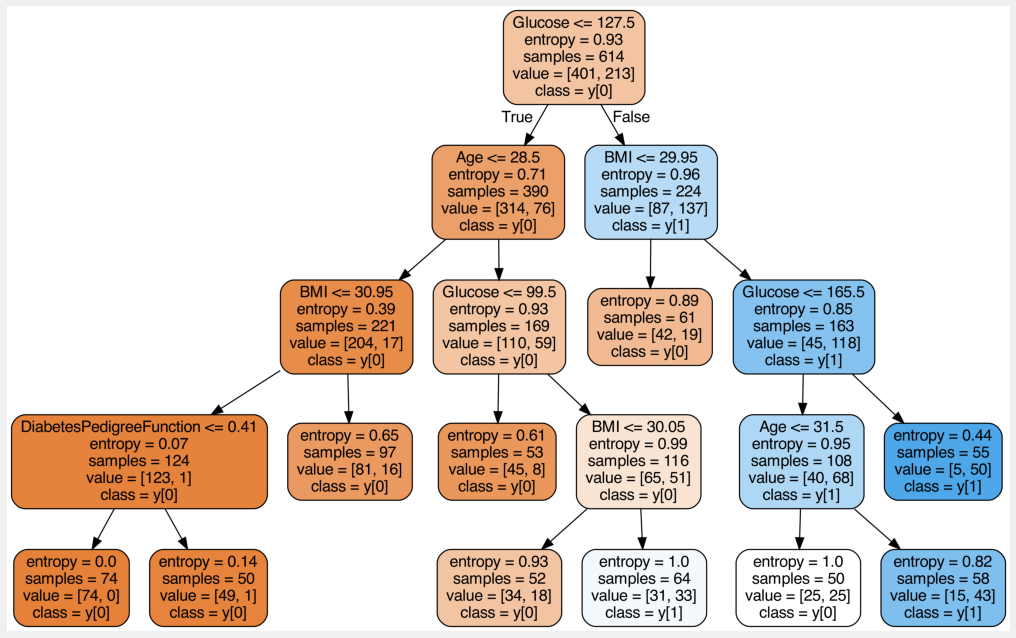

In [103]:
from subprocess import call
from sklearn.tree import export_graphviz
def display_tree(estimator, out_file_name, feature_names, fig_size=(16, 18)):
    dot_out_file = out_file_name + '.dot'
    png_out_file = out_file_name + '.png'
    export_graphviz(decision_tree=estimator, out_file=dot_out_file, feature_names=feature_names, class_names=True, rounded = True, proportion = False, precision = 2, filled = True)
    # Convert to png
    call(['dot', '-Tpng', dot_out_file, '-o', png_out_file, '-Gdpi=600'])

    # Display in python
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(plt.imread(png_out_file))
    ax.axis('off') #don't show the x and y axis

display_tree(dt,'tree', X.columns)